In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ccdefault.csv', header=0)

In [3]:
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.shape

(30000, 25)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.iloc[:,1:-2]
y = df.iloc[:,-1]

In [7]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rf = RandomForestClassifier(n_estimators=50)

In [10]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
cross_pred_test=rf.predict(X_test)
cross_pred_train=rf.predict(X_train)
train_accuracy_cv = cross_val_score(rf,X=X_train,y=y_train,cv=10,n_jobs=-1)
test_accuracy_cv = cross_val_score(rf,X=X_test,y=y_test,cv=10,n_jobs=-1)

In [13]:
test_rs_cv = list(test_accuracy_cv)

train_rs_cv = list(train_accuracy_cv)
rs_cv = pd.DataFrame(np.array([train_rs_cv,test_rs_cv]),columns = ['1','2','3','4','5','6','7','8','9','10'])
rs_cv.rename(index={0:'Train',1:'Test'}, inplace=True)
rs_cv

,1,2,3,4,5,6,7,8,9,10
Train,0.810441,0.806738,0.827101,0.817407,0.818519,0.807037,0.825185,0.818451,0.808077,0.805113
Test,0.784053,0.790000,0.823333,0.806667,0.843333,0.790000,0.810000,0.840000,0.823333,0.826087


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_60 = RandomForestClassifier(n_estimators=60)
rf_60.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
cross_pred_test=rf_60.predict(X_test)
cross_pred_train=rf_60.predict(X_train)
train_accuracy_cv = cross_val_score(rf_60,X=X_train,y=y_train,cv=10,n_jobs=-1)
test_accuracy_cv = cross_val_score(rf_60,X=X_test,y=y_test,cv=10,n_jobs=-1)
test_rs_cv = list(test_accuracy_cv)

train_rs_cv = list(train_accuracy_cv)
rs_cv = pd.DataFrame(np.array([train_rs_cv,test_rs_cv]),columns = ['1','2','3','4','5','6','7','8','9','10'])
rs_cv.rename(index={0:'Train',1:'Test'}, inplace=True)
rs_cv

,1,2,3,4,5,6,7,8,9,10
Train,0.810811,0.808219,0.824880,0.818519,0.820741,0.809630,0.822222,0.816969,0.805484,0.80289
Test,0.777409,0.780000,0.813333,0.803333,0.826667,0.796667,0.810000,0.846667,0.826667,0.80602


In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_85 = RandomForestClassifier(n_estimators=85)
rf_85.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
cross_pred_test=rf.predict(X_test)
cross_pred_train=rf.predict(X_train)
train_accuracy_cv = cross_val_score(rf_85,X=X_train,y=y_train,cv=10,n_jobs=-1)
test_accuracy_cv = cross_val_score(rf_85,X=X_test,y=y_test,cv=10,n_jobs=-1)
test_rs_cv = list(test_accuracy_cv)

train_rs_cv = list(train_accuracy_cv)
rs_cv = pd.DataFrame(np.array([train_rs_cv,test_rs_cv]),columns = ['1','2','3','4','5','6','7','8','9','10'])
rs_cv.rename(index={0:'Train',1:'Test'}, inplace=True)
rs_cv

,1,2,3,4,5,6,7,8,9,10
Train,0.805998,0.806368,0.825620,0.817037,0.819259,0.811111,0.821852,0.817340,0.813264,0.809559
Test,0.777409,0.793333,0.816667,0.806667,0.836667,0.786667,0.810000,0.846667,0.813333,0.826087


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [17]:
param_grid = {
                 'n_estimators': [50, 80, 85,100],
             }
rf1 = RandomForestClassifier()

In [18]:

grid_rf = GridSearchCV(rf1, param_grid,cv = 10)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [19]:
grid_rf.best_params_ 

{'n_estimators': 100}

## Importance

In [20]:
importances = rf_85.feature_importances_

Feature importance ranking:
1. feature 5 LIMIT_BAL (0.091320)
2. feature 4 SEX (0.070741)
3. feature 11 EDUCATION (0.064539)
4. feature 0 MARRIAGE (0.062656)
5. feature 12 AGE (0.057939)
6. feature 13 PAY_0 (0.055135)
7. feature 15 PAY_2 (0.053985)
8. feature 16 PAY_3 (0.053913)
9. feature 14 PAY_4 (0.053591)
10. feature 6 PAY_5 (0.053342)
11. feature 17 PAY_6 (0.052719)
12. feature 18 BILL_AMT1 (0.050678)
13. feature 19 BILL_AMT2 (0.048794)
14. feature 21 BILL_AMT3 (0.046994)
15. feature 20 BILL_AMT4 (0.045915)
16. feature 7 BILL_AMT5 (0.028878)
17. feature 8 BILL_AMT6 (0.022086)
18. feature 2 PAY_AMT1 (0.021779)
19. feature 9 PAY_AMT2 (0.019872)
20. feature 10 PAY_AMT3 (0.018469)
21. feature 3 PAY_AMT4 (0.014451)
22. feature 1 PAY_AMT5 (0.012206)


/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  after removing the cwd from sys.path.


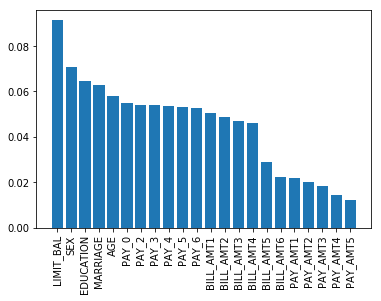

In [21]:

#std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_name = X_test.columns.get_values()

# Print the feature ranking
print("Feature importance ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f],  feature_name[f], importances[indices[f]]))
    
plt.figure(1)
plt.bar(feature_name[:], importances[indices[:]])
plt.xticks(rotation=90)
plt.show()

In [22]:
print("My name is Zhuoyuan Zhang")
print("My NetID is: zz10")

print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Zhuoyuan Zhang
My NetID is: zz10
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
